In [ ]:
from google.colab import drive #구글드라이브와 연동
drive.mount("/gdrive")

Mounted at /gdrive


In [ ]:
import requests #웹 페이지의 HTML을 가져오는 모듈
from bs4 import BeautifulSoup #HTML을 파싱하는 모듈 

#웹 페이지를 가져와 BeautifulSoup의 객체로 만듦
response = requests.get("https://www.weather.go.kr/weather/observation/currentweather.jsp")
soup = BeautifulSoup(response.content, "html.parser")

In [ ]:
table = soup.find('table', {   #<table class = "table_develop3" 찾기
    'class' : 'table_develop3'
}) 
#soup에 담긴 태그 중 (태그이름,(AND) {속성이름 : 속성값})인 것을 찾는다. 

data = [] #데이터를 저장할 리스트 생성

for tr in table.find_all('tr'): #모든 <tr> 태그에 대해 반복
  tds = list(tr.find_all('td'))

  for td in tds:
    if td.find('a'):
      point = td.find('a').text #글시 가져올 때, .text
      temperature = tds[5].text
      humidity = tds[9].text
      data.append([point, temperature, humidity]) 

data

[['강릉', '23.0', '67'],
 ['강진군', '27.7', '52'],
 ['강화', '21.8', '83'],
 ['거제', '22.8', '74'],
 ['거창', '25.9', '57'],
 ['경주시', '26.4', '56'],
 ['고산', '23.2', '86'],
 ['고창', '25.1', '56'],
 ['고창군', '26.5', '51'],
 ['고흥', '26.8', '55'],
 ['광양시', '25.7', '58'],
 ['광주', '26.4', '54'],
 ['구미', '24.6', '73'],
 ['군산', '23.9', '65'],
 ['금산', '23.7', '65'],
 ['김해시', '23.4', '77'],
 ['남원', '25.4', '59'],
 ['남해', '26.0', '60'],
 ['대관령', '17.8', '83'],
 ['대구', '25.4', '53'],
 ['대전', '23.9', '72'],
 ['동두천', '22.8', '80'],
 ['동해', '20.9', '70'],
 ['목포', '25.1', '66'],
 ['문경', '22.9', '67'],
 ['밀양', '25.9', '56'],
 ['백령도', '22.6', '87'],
 ['보령', '22.9', '73'],
 ['보성군', '27.1', '64'],
 ['보은', '23.8', '66'],
 ['봉화', '20.7', '70'],
 ['부산', '21.7', '77'],
 ['부안', '24.3', '62'],
 ['부여', '24.9', '62'],
 ['북강릉', '22.7', '65'],
 ['북창원', '26.1', '62'],
 ['북춘천', '23.2', '74'],
 ['산청', '26.3', '60'],
 ['상주', '23.6', '73'],
 ['서귀포', '25.2', '65'],
 ['서산', '23.4', '70'],
 ['서울', '23.4', '69'],
 ['성산', '25.0', '67']

In [ ]:
#데이터를 csv 파일에 저장하기
with open('/gdrive/My Drive/Colab Notebooks/weather.csv', 'w') as file: #데이터를 저장할 객체 file이 만들어짐
  file.write("point,temperature,humidity\n") #file.write(저장하고 싶은)
  for i in data:
    file.write("{},{},{}\n".format(i[0],i[1],i[2])) #{}안의 숫자는 순서를 의미! {0}: 뒤에 있는 것 중 첫번쨰가 이 자리로#데이터를 csv 파일에 저장하기

# 데이터를 그래프로 그리기

In [ ]:
%matplotlib inline 

import pandas as pd #데이터를 저장, 처리하는 패키지
import matplotlib as mpl #그래프 그리는 패키지
import matplotlib.pyplot as plt #그래프 그리는 패키지

In [ ]:
#csv 파일을 읽어서 Dataframe 객체로 만듦
df = pd.read_csv('/gdrive/My Drive/Colab Notebooks/weather.csv')

In [ ]:
df["temperature"]

0     23.0
1     27.7
2     21.8
3     22.8
4     25.9
      ... 
90    25.8
91    26.9
92    23.7
93    21.7
94    23.1
Name: temperature, Length: 95, dtype: float64

In [ ]:
df["humidity"]

0     67
1     52
2     83
3     74
4     57
      ..
90    60
91    55
92    68
93    71
94    73
Name: humidity, Length: 95, dtype: int64

In [ ]:
(df['point'] == "강릉") | (df['point'] == "거창") #OR 조건

0      True
1     False
2     False
3     False
4      True
      ...  
90    False
91    False
92    False
93    False
94    False
Name: point, Length: 95, dtype: bool

In [ ]:
df[(df["point"] == "강릉") | (df["point"] == "거창")] #조건이 참인 라인만 리턴

,point,temperature,humidity
0,강릉,23.0,67
4,거창,25.9,57


In [ ]:
df = pd.read_csv("/gdrive/My Drive/Colab Notebooks/weather.csv", index_col = "point") #point 칸을 인덱스로 지정 - 인덱스: 주로 검색할 칸

In [ ]:
df 

,temperature,humidity
point,,
강릉,23.0,67
강진군,27.7,52
강화,21.8,83
거제,22.8,74
거창,25.9,57
...,...,...
합천,25.8,60
해남,26.9,55
홍성,23.7,68


In [ ]:
#특별시, 광역시만 모아서 DataFrame 객체로 만듦
city_df = df.loc[['서울', '인천', '대구', '대전', '광주', '부산', '울산']]
city_df

,temperature,humidity
point,,
서울,23.4,69
인천,22.8,71
대구,25.4,53
대전,23.9,72
광주,26.4,54
부산,21.7,77
울산,23.6,74


In [ ]:
df.loc[['서울', '부산']]

,temperature,humidity
point,,
서울,23.4,69
부산,21.7,77


In [ ]:
%config InlineBackend.figure_format = 'retina' #그래프의 글자를 선명하게 출력하도록 설정 
!apt -qq -y install fonts-nanum #나눔 글자체 설치

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.


In [ ]:
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' #나눔고딕 글자체의 전체 경로 설정
font = fm.FontProperties(fname=fontpath).get_name() #글자체의 경로 설정

In [ ]:
font

'NanumBarunGothic'

In [ ]:
plt.rc('font', family = 'NanumBarunGothic')  #폰트 이름 설정
mpl.font_manager._rebuild() #폰트 업데이트

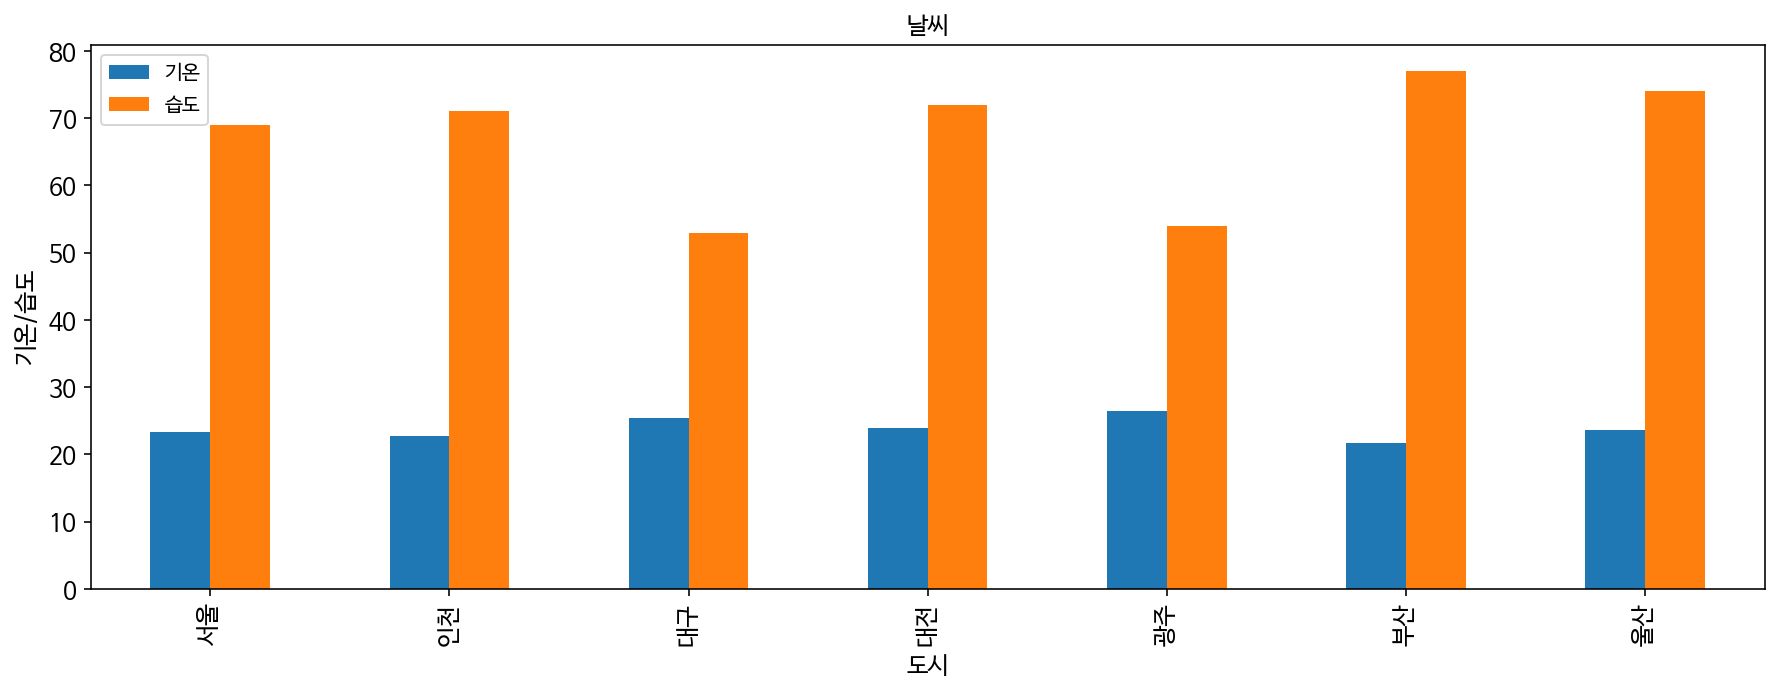

In [ ]:
#차트 종류, 제목, 차트 크기, 범례, 폰트 크기 설정
ax = city_df.plot(kind = 'bar', title = '날씨', figsize = (15, 5), legend = True, fontsize = 12)
ax.set_xlabel('도시', fontsize = 12) #x축 정보 표시
ax.set_ylabel('기온/습도', fontsize = 12) #y축 정보 표시
ax.legend(['기온', '습도'], fontsize = 10) #범례 지정